In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold,RepeatedKFold, GridSearchCV,  RandomizedSearchCV
import math
from data import *
import pandas as pd
from itertools import islice
import seaborn as sns; sns.set_theme()
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from statistics import mean

df = pd.read_hdf('/Users/lukemcdermott/Desktop/Physics/spectral_templates_data_version_june20.h5', key = '/binaries')
bin_df = pd.read_hdf('/Users/lukemcdermott/Desktop/Physics/spectral_templates_data_version_june20.h5', key = '/binaries')
df = df.loc[df['primary_type'] <= df['secondary_type']]
display(df)

x = np.insert(np.arange(441), 0, -1)
#x = np.arange(441)
images = df.iloc[:, x].to_numpy()
labels = df.iloc[:, 441:443].to_numpy()
labels_flat = np.zeros((len(labels)))
for idx, i in enumerate(labels):
    labels_flat[idx] = 24*(int(i[0]-16)) + int((i[1]-16))
#Convert 2D labels into 1D Discrete Classes
    
idx = np.random.choice(np.arange(len(images)), 35000, replace=False)
images_sample = images[idx]
labels_sample = labels_flat[idx]

# Split into training and testing sets
train_images, train_labels, test_images, test_labels = split_data(images_sample, labels_sample)

clf = LogisticRegression(max_iter = 1000, solver='lbfgs')
clf.fit(train_images, train_labels)
clf.score(test_images, test_labels)

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_434,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,primary_type,secondary_type,system_type
0,0.568345,0.615487,0.668477,0.705189,0.698754,0.700950,0.717146,0.704941,0.707754,0.723033,...,0.209508,0.203912,0.205196,0.201559,0.207766,0.209226,0.214793,16.0,16.0,16.0
1,0.496365,0.563067,0.602393,0.659527,0.682808,0.676481,0.674343,0.689054,0.676825,0.670386,...,0.213932,0.207528,0.206223,0.201853,0.205284,0.206424,0.206224,16.0,17.0,16.0
2,0.520227,0.580531,0.627045,0.645281,0.665795,0.678923,0.686509,0.685623,0.674414,0.702066,...,0.187648,0.184240,0.177598,0.175445,0.175319,0.181286,0.176042,16.0,16.0,16.0
3,0.483774,0.556865,0.603915,0.641451,0.698212,0.728678,0.666010,0.671234,0.659358,0.688617,...,0.233598,0.225866,0.234960,0.214639,0.219380,0.224144,0.224282,16.0,16.0,16.0
4,0.434787,0.504214,0.543165,0.611378,0.659270,0.680497,0.663214,0.634306,0.645955,0.654454,...,0.218515,0.209248,0.202981,0.198711,0.201315,0.201008,0.202865,16.0,16.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110809,0.030098,0.014580,-0.007441,-0.006942,-0.007369,0.006425,0.016458,0.006826,-0.001549,0.020413,...,-0.000636,-0.005062,-0.001746,0.002502,0.002527,0.002917,0.003646,38.0,38.0,38.0
110810,0.005596,0.004737,-0.002069,0.010406,0.006171,0.009747,0.011305,0.008200,0.004347,0.014751,...,-0.001543,-0.004403,0.001089,0.004393,0.004432,0.004561,-0.000681,38.0,39.0,38.0
110848,0.073538,0.009197,-0.005860,-0.038976,-0.014792,-0.014072,0.036644,-0.001032,-0.009587,0.015874,...,0.003452,-0.007673,-0.005274,0.000802,0.001512,0.001638,0.005702,38.0,38.0,38.0
110849,0.001377,-0.014757,-0.004499,0.012407,-0.003643,-0.001074,0.012893,-0.004316,0.009678,-0.000535,...,-0.000068,-0.007200,0.002112,0.005037,0.006211,0.005238,-0.004113,38.0,39.0,39.0


28000


KeyboardInterrupt: 

In [1]:
from model import *

(35000, 1, 224)
(35000, 576)


In [2]:
"""
#Initialize ResNet
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
print(num_ftrs)
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 2)
"""
model_ft = Net()
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=.1, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=100, gamma=0.1)

In [3]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=1)

Epoch 0/0
----------
train Loss: 6.3488 Acc: 0.0104
val Loss: 6.3487 Acc: 0.0104

tensor([1.0111e-10, 4.1878e-10, 1.5552e-10, 3.4316e-10, 1.5197e-10, 2.8088e-10,
        1.6199e-10, 2.3281e-10, 1.2100e-10, 1.0268e-10, 4.0497e-10, 3.1545e-10,
        1.8710e-10, 1.2854e-10, 2.8586e-10, 9.2529e-11, 2.8495e-10, 1.0209e-10,
        8.1209e-10, 2.8135e-10, 1.3114e-10, 1.6582e-10, 1.4138e-10, 8.3751e-11,
        9.7402e-11, 2.8567e-10, 5.3575e-10, 1.1752e-09, 2.4194e-10, 2.7951e-10,
        6.5700e-10, 1.0863e-10, 1.7520e-10, 1.1219e-10, 9.1076e-10, 3.8050e-10,
        2.0791e-10, 2.8292e-10, 2.8143e-10, 8.3220e-11, 2.3306e-10, 1.3131e-10,
        1.1599e-10, 1.1838e-10, 1.4009e-10, 4.8689e-10, 1.2196e-10, 6.5697e-11,
        1.3820e-10, 9.5461e-11, 1.9861e-10, 3.5899e-08, 4.1849e-10, 1.0074e-09,
        2.1813e-10, 1.3720e-10, 1.2278e-10, 1.1856e-10, 1.9163e-10, 2.3836e-10,
        1.4485e-10, 1.8167e-10, 3.2833e-10, 1.1883e-10, 1.7730e-10, 3.2737e-10,
        1.4316e-10, 1.7137e-10, 1.3820

In [5]:
df = pd.read_hdf('/Users/lukemcdermott/Desktop/Physics/spectral_templates_data_version_june20.h5', key = '/binaries')
df = df.loc[df['primary_type'] <= df['secondary_type']]
pca = PCA(n_components=224)
df = df.sample(10000)
X=df.iloc[:,:440].values    #grab flux values
pca.fit(X)
x=np.expand_dims(pca.transform(X), axis = 1)
print(np.shape(x))
labels_df =df.iloc[:,441:443].values #grab labels
print(np.shape(labels_df))

images= torch.tensor(x,dtype=torch.float32)
labels= torch.tensor(labels_df,dtype=torch.float32)
#labels = (labels - 28) / 11
images = nn.functional.normalize(images)

train_images = images[:int(len(images)*0.8)]
train_labels = labels[:int(len(labels)*0.8)]
test_images = images[int(len(images)*0.8):]
test_labels = labels[int(len(labels)*0.8):]

(10000, 1, 224)
(10000, 2)


TEST THE MODEL:
- this should use the test_images from model import *

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

def acc_map(results, title = 'Prediction'):
    plt.figure(figsize = (8,7), facecolor='white')
    ax = sns.heatmap(results, cmap = "mako")
    labels = ['M6','M7','M8','M9','L0','L1','L2','L3','L4','L5','L6','L7','L8','L9','T0','T1','T2','T3','T4','T5','T6','T7','T8','T9']
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.patch.set_edgecolor('black')  
    ax.patch.set_linewidth('10') 
    ax.set_ylabel('Primary')
    ax.set_xlabel('Seconday')
    ax.set_title(title)

[ 66 113  39 ...  34 137 227]
Label:  18 34
Label:  20 33
Label:  17 31
Label:  19 35


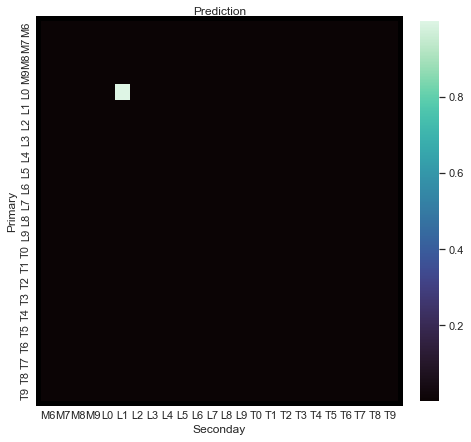

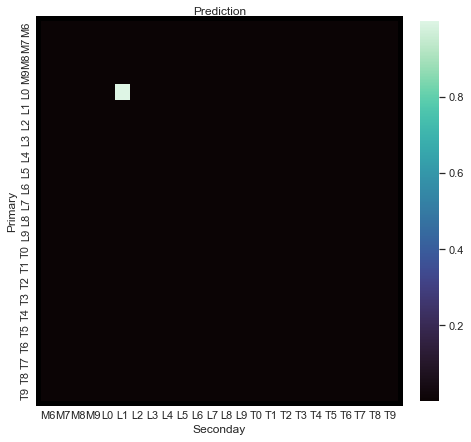

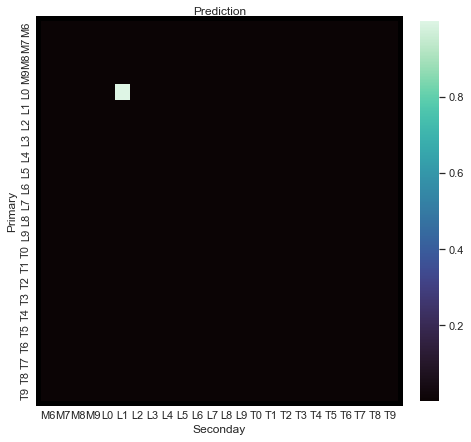

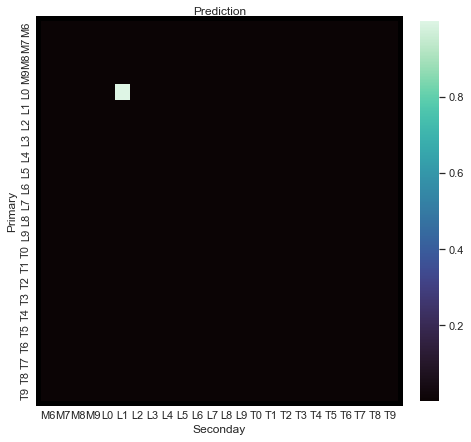

In [6]:
test_labels = test_labels[torch.randperm(test_labels.shape[0])].view(test_labels.size())
target = torch.argmax(test_labels[:], dim=1).numpy()
output = np.reshape(model_ft(test_images[:4]).detach().numpy(), (4,24,24))
print(target)
for i in range(4):
    print('Label: ', target[i] // 24 + 16, target[i] - (target[i] // 24) * 24 + 16)
    acc_map(output[i])